## Tuning of the RBF parameter for the CKN-MNIST dataset

In [16]:
from Modele import Modele
from Optimiseur import Optimiseur
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Load the dataset
data = np.load('ckn_mnist.npz')

# Access the arrays in the dataset
images = data['X']
labels = data['y']
# Binarization of the labels
labels = np.where(labels < 5, -1, 1)

print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

n=1000

x_values = np.random.randint(0, images.shape[0] - n, size=10)
x=0
# Take only n images for training
images = images[x:x+n]
labels = labels[x:x+n]
# Separet the dataset into training and testing
n_train = int(n*0.8)
train_images = images[:n_train]
train_labels = labels[:n_train]
test_images = images[n_train:]
test_labels = labels[n_train:]

# Reshape the images to 2D
X_train = train_images.reshape(train_images.shape[0], -1)
X_test = test_images.reshape(test_images.shape[0], -1)
y_train = train_labels.reshape(-1)
y_test = test_labels.reshape(-1)

print("Training data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Images shape: (60000, 2304)
Labels shape: (60000, 1)
Training data shape:  (800, 2304)
Test data shape:  (200, 2304)


In [ ]:
# Choose the gamma values to test
gammas = [1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5]
alphas = []
train_loss = []
train_accuracy = []
test_accuracy = []

# Iterate over the gamma values and compute the results for the optimal alpha
for gamma in gammas:
    modele = Modele(0,gamma)
    alpha = modele.alpha_opt(X_train,y_train,gamma)
    alphas.append(alpha)
    train_loss.append(modele.loss_function(X_train,y_train,alpha))
    train_accuracy.append(modele.accuracy(X_train,X_train,y_train,alpha))
    test_accuracy.append(modele.accuracy(X_train,X_test,y_test,alpha))

In [ ]:
# Plot the results
best_test = np.where(test_accuracy == np.max(test_accuracy))[0]
best_train = np.where(train_accuracy == np.max(train_accuracy))[0]

print("best gamma range for train: ", [gammas[i] for i in best_train])
print("best gamma range for test: ", [gammas[i] for i in best_test])

best gamma range for train:  [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0, 100000.0]
best gamma range for test:  [1]


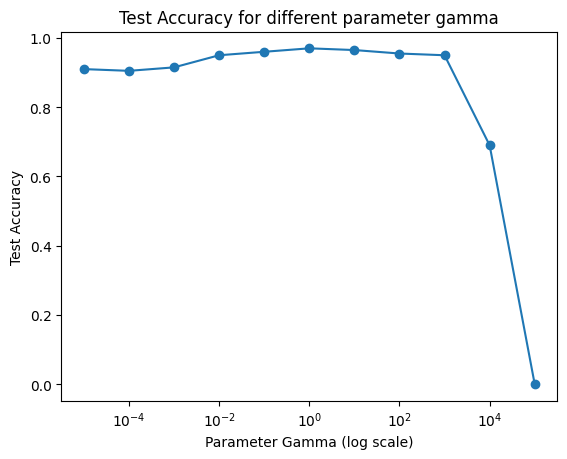

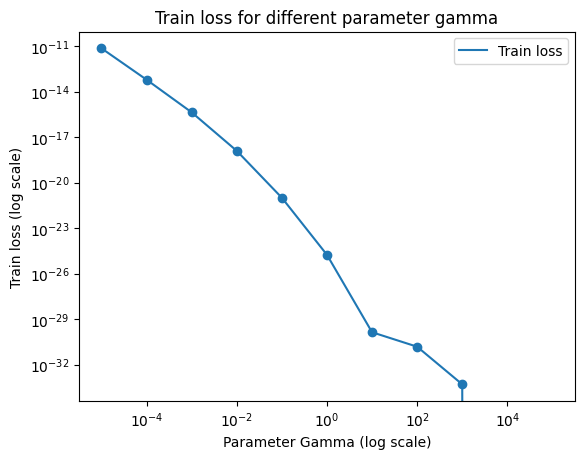

In [ ]:
# Plotting the results on a Figure
plt.figure()
plt.scatter(gammas, test_accuracy)
plt.plot(gammas, test_accuracy, label='Test accuracy')
plt.xlabel('Parameter Gamma (log scale)')
plt.xscale('log')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for different parameter gamma')
plt.savefig('accuracy_rbf.pdf')
plt.show()

plt.figure()
plt.scatter(gammas,train_loss)
plt.plot(gammas, train_loss, label='Train loss')
plt.xlabel('Parameter Gamma (log scale)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Train loss (log scale)')
plt.title('Train loss for different parameter gamma')
plt.legend()
plt.show()



In [ ]:
# Now we will test the model with a finer range of gamma values
gammas_2 = np.linspace(1e-2,1e2,50)
alphas_2 = []
train_loss_2 = []
train_accuracy_2 = []
test_accuracy_2 = []

for gamma in gammas_2:
    modele = Modele(0,gamma)
    alpha = modele.alpha_opt(X_train,y_train,gamma)
    alphas_2.append(alpha)
    train_loss_2.append(modele.loss_function(X_train,y_train,alpha))
    train_accuracy_2.append(modele.accuracy(X_train,X_train,y_train,alpha))
    test_accuracy_2.append(modele.accuracy(X_train,X_test,y_test,alpha))

In [35]:
best_test = np.where(test_accuracy_2 == np.max(test_accuracy_2))[0]
best_train = np.where(train_accuracy_2 == np.max(train_accuracy_2))[0]

print("best gamma range for train: ", [gammas_2[i] for i in best_train])
print("best gamma range for test: ", [gammas_2[i] for i in best_test])

best gamma range for train:  [np.float64(0.01), np.float64(2.050612244897959), np.float64(4.091224489795918), np.float64(6.131836734693877), np.float64(8.172448979591836), np.float64(10.213061224489795), np.float64(12.253673469387754), np.float64(14.294285714285714), np.float64(16.334897959183674), np.float64(18.375510204081632), np.float64(20.416122448979593), np.float64(22.456734693877554), np.float64(24.49734693877551), np.float64(26.53795918367347), np.float64(28.57857142857143), np.float64(30.61918367346939), np.float64(32.659795918367344), np.float64(34.7004081632653), np.float64(36.74102040816326), np.float64(38.78163265306122), np.float64(40.82224489795918), np.float64(42.86285714285714), np.float64(44.9034693877551), np.float64(46.94408163265306), np.float64(48.98469387755102), np.float64(51.025306122448974), np.float64(53.06591836734693), np.float64(55.106530612244896), np.float64(57.14714285714285), np.float64(59.18775510204081), np.float64(61.228367346938775), np.float64(63

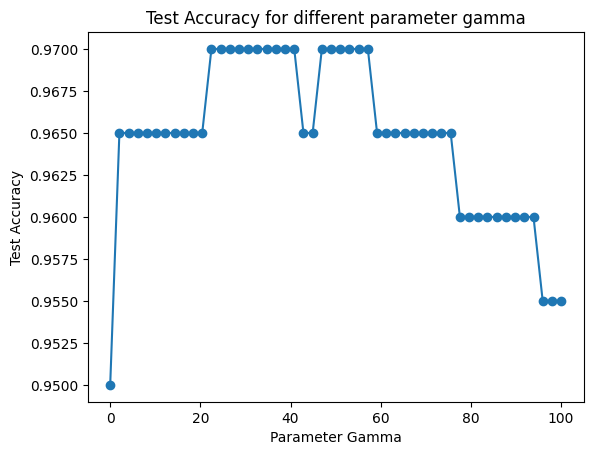

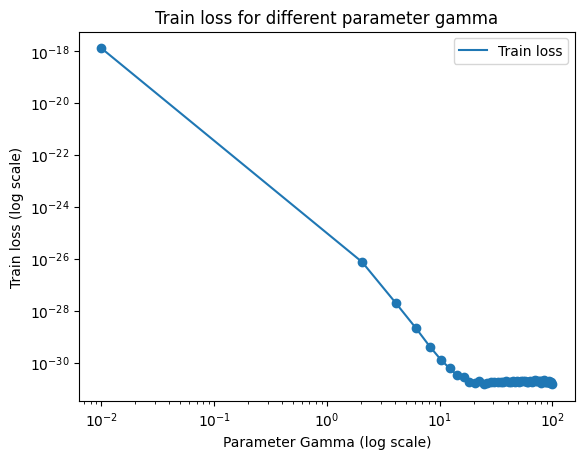

In [37]:
plt.figure()
plt.scatter(gammas_2, test_accuracy_2)
plt.plot(gammas_2, test_accuracy_2, label='Test accuracy')
plt.xlabel('Parameter Gamma')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for different parameter gamma')
plt.savefig('accuracy_rbf_2.pdf')
plt.show()

plt.figure()
plt.scatter(gammas_2,train_loss_2)
plt.plot(gammas_2, train_loss_2, label='Train loss')
plt.xlabel('Parameter Gamma (log scale)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Train loss (log scale)')
plt.title('Train loss for different parameter gamma')
plt.legend()
plt.show()

